# Basic Breast-Cancer Classification Model using a K-Nearest-Neighbors Classifier

Practice Project for my Codecademy "Data Scientist: Machine Learning Specialist" certification course

Robert Hall

12/13/2024

In [2]:
# import scikit-learn breast cancer dataset
from sklearn.datasets import load_breast_cancer

# assign data to 
data = load_breast_cancer()

# examine data by printing first datapoint, feature names
print(data.data[0])
print(data.feature_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
# split data into train, test data
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(data.data, data.target, test_size=0.2, random_state=100) 

# build the KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

# train the model by fitting the training sets
classifier.fit(training_data, training_labels) 

# score the classifier using the validation sets
print(classifier.score(validation_data, validation_labels))

0.9473684210526315


In [4]:
# test for number of neighbors that produces the best model score
model_scores = {}
accuracies = []
for i in range(1, 101):
  classifier=KNeighborsClassifier(n_neighbors=i)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))
  model_scores[i] = round(classifier.score(validation_data, validation_labels), 5)
print(f"N Neighbors for Highest Accuracy: {max(model_scores, key=model_scores.get)}")

N Neighbors for Highest Accuracy: 23


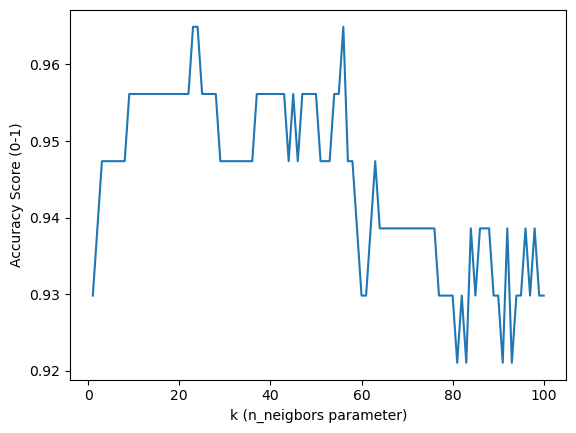

In [5]:
# plot chart visualizing model accuracy for each incremental value of n_neighbors
import matplotlib.pyplot as plt
k_list = [k for k in range(1, 101)]
plt.plot(k_list, accuracies)
plt.xlabel("k (n_neigbors parameter)")
plt.ylabel("Accuracy Score (0-1)")
plt.show()